In [1]:
import unicodedata  
import inflect       
import re
from nltk import sent_tokenize
from nltk.stem import LancasterStemmer
from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
import pandas as pd
import numpy as np
import collections

In [2]:
fake_news_df = pd.read_csv("D:\IS6751_fake_real_news_classification-main\IS6751_fake_real_news_classification-main\Data\Fake.csv")
true_news_df = pd.read_csv("D:\IS6751_fake_real_news_classification-main\IS6751_fake_real_news_classification-main\Data\True.csv")
fake_news_df['label'] = 'False'
true_news_df['label'] = 'True'
news_df = pd.concat([fake_news_df, true_news_df], ignore_index=True, axis=0)
print(news_df.shape)
print(news_df.columns)
print(news_df.info())

(44898, 5)
Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB
None


In [3]:
print(news_df.columns)

Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')


In [4]:
news_df = news_df[news_df.text.isna() == False]
news_df = news_df[news_df.title.isna() == False]
news_df = news_df[news_df.subject.isna() == False]
print(news_df.shape)

(44898, 5)


In [5]:
news_df['text'] = news_df['title'] + ' ' + news_df['text'] 
news_df.drop(['title', 'date', 'subject'], axis=1, inplace=True)
print(news_df.head())
print(news_df.label.value_counts())

                                                text  label
0   Donald Trump Sends Out Embarrassing New Year’...  False
1   Drunk Bragging Trump Staffer Started Russian ...  False
2   Sheriff David Clarke Becomes An Internet Joke...  False
3   Trump Is So Obsessed He Even Has Obama’s Name...  False
4   Pope Francis Just Called Out Donald Trump Dur...  False
label
False    23481
True     21417
Name: count, dtype: int64


In [6]:
by_labels = collections.defaultdict(list)
for _, row in news_df.iterrows():
    by_labels[row.label].append(row.to_dict())

In [7]:
# split dateset to train, validate and test dataset and stored in list
final_list = []
np.random.seed(1234)

for _, item_list in sorted(by_labels.items()):

    np.random.shuffle(item_list)
    
    n_total = len(item_list)
    n_train = int(0.7 * n_total)
    n_test = int(0.3 * n_total)
    
    # Give data point a split attribute
    for item in item_list[:n_train]:
        item['split'] = 'train'
    for item in item_list[n_train:]:
        item['split'] = 'test'

    # Add to final list
    final_list.extend(item_list) 

In [8]:
final_df = pd.DataFrame(final_list)

In [9]:

final_df.head()

,text,label,split
0,Jake Tapper Burns Trump With Bill Maher: He I...,False,train
1,BURIED BY MEDIA: Aide To Leftist US Congressma...,False,train
2,CNN CLOWN Who Cries About “FAKE NEWS” Uses Unv...,False,train
3,Delusional Obama On How Divided America Has Be...,False,train
4,Veterans: Cozy Trump Relationship With Russia...,False,train


In [10]:
X_train = final_df[final_df['split']=='train'][['text']]
X_test = final_df[final_df['split']=='test'][['text']]

y_train=final_df[final_df['split']=='train'][['label']]
y_test = final_df[final_df['split']=='test'][['label']]

propressing

In [11]:
'''
def remove_stopwords(words):
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words

def stem_words(words):
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems


def preprocess_text(text):
    if type(text) == float:
        print(text)
    text = text.lower()
    text = re.sub(r"([.,!?])", r" \1 ", text)  # E.g., convert "end." to "end . " ; \1 indicates a matched character
    text = re.sub(r"[^a-zA-Z0-9]+", r" ", text) # replace special characters with empty string
    return text.strip()
'''

'\ndef remove_stopwords(words):\n    new_words = []\n    for word in words:\n        if word not in stopwords.words(\'english\'):\n            new_words.append(word)\n    return new_words\n\ndef stem_words(words):\n    stemmer = LancasterStemmer()\n    stems = []\n    for word in words:\n        stem = stemmer.stem(word)\n        stems.append(stem)\n    return stems\n\n\ndef preprocess_text(text):\n    if type(text) == float:\n        print(text)\n    text = text.lower()\n    text = re.sub(r"([.,!?])", r" \x01 ", text)  # E.g., convert "end." to "end . " ; \x01 indicates a matched character\n    text = re.sub(r"[^a-zA-Z0-9]+", r" ", text) # replace special characters with empty string\n    return text.strip()\n'

In [12]:
#X_train['text'] = X_train.text.apply(preprocess_text)
#X_test['text'] = X_test.text.apply(preprocess_text)

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(
    max_features=4000, 
    stop_words='english'  
)
X_train_tfidf = tfidf.fit_transform(X_train['text'])
X_test_tfidf = tfidf.transform(X_test['text'])

logistic regression

In [14]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_tfidf, y_train)

d:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [15]:
y_pred = lr.predict(X_test_tfidf)

In [16]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9858956276445698


In [17]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# For binary classification, we have two classes: False (0) and True (1)
binary_classes = ['False', 'True']
print("Binary classes:", binary_classes)

Binary classes: ['False', 'True']


In [18]:
import pandas as pd
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm.T, index=binary_classes, columns=binary_classes)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)

True       False  True
Predicted             
False       6923    68
True         122  6358


In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=binary_classes, digits = 5))

              precision    recall  f1-score   support

       False    0.99027   0.98268   0.98646      7045
        True    0.98117   0.98942   0.98528      6426

    accuracy                        0.98590     13471
   macro avg    0.98572   0.98605   0.98587     13471
weighted avg    0.98593   0.98590   0.98590     13471



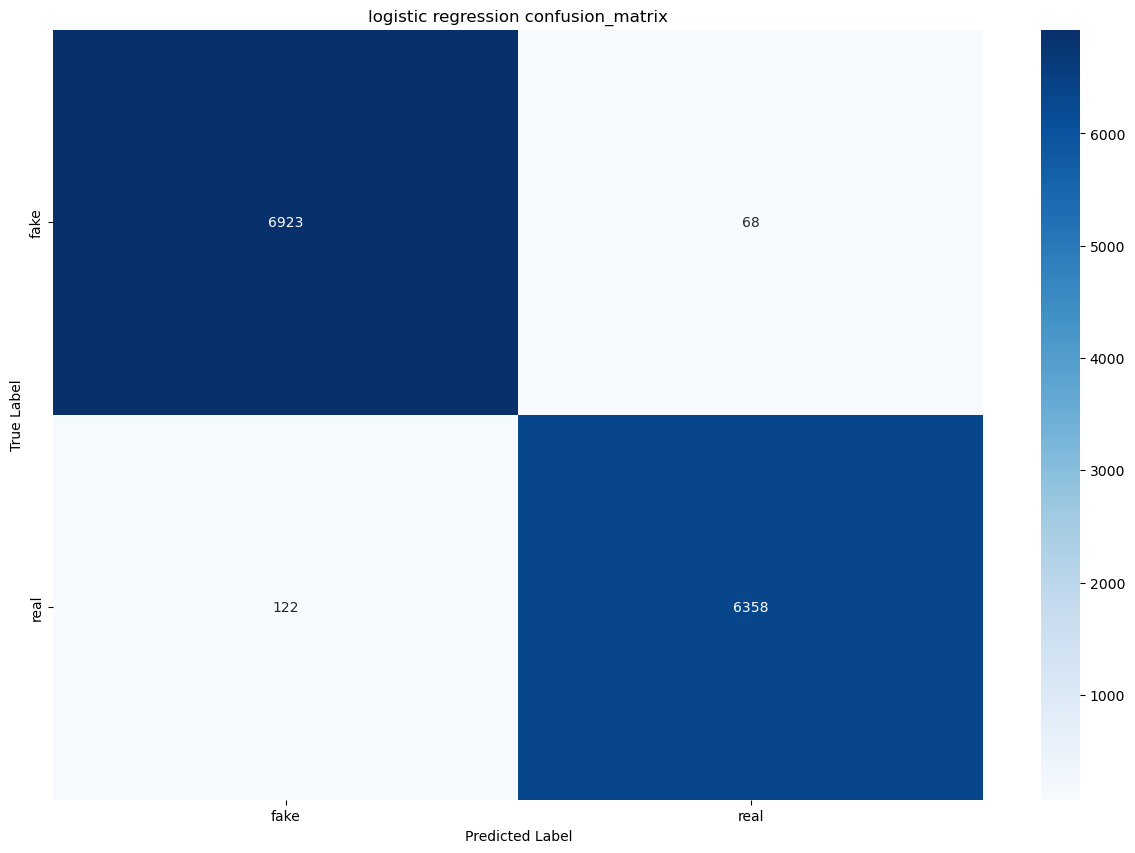

In [23]:
from matplotlib import pyplot as plt
import seaborn as sns
class_names = ['fake', 'real']
name = 'logistic regression'
cm = confusion_matrix(y_pred, y_test)
plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names)
plt.title(f'{name} confusion_matrix', fontsize=12)
plt.ylabel('True Label', fontsize=10)
plt.xlabel('Predicted Label', fontsize=10)
plt.show()